In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3327 non-null   object 
 1   Open       3327 non-null   float64
 2   High       3327 non-null   float64
 3   Low        3327 non-null   float64
 4   Close      3327 non-null   float64
 5   Adj Close  3327 non-null   float64
 6   Volume     3327 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.1+ KB


In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [6]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2023-09-15 00:00:00
Total days = 4826 days


In [7]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3.327000e+03
mean,66.778003,68.270296,65.171872,66.761912,66.761912,9.632108e+07
std,99.452115,101.708570,96.966982,99.376041,99.376041,8.080585e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.000000,10.323667,9.780000,10.017667,10.017667,4.526505e+07
50%,16.733334,16.970667,16.488667,16.713333,16.713333,7.965720e+07
75%,58.693332,59.789667,57.084665,58.817333,58.817333,1.230548e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<Axes: >

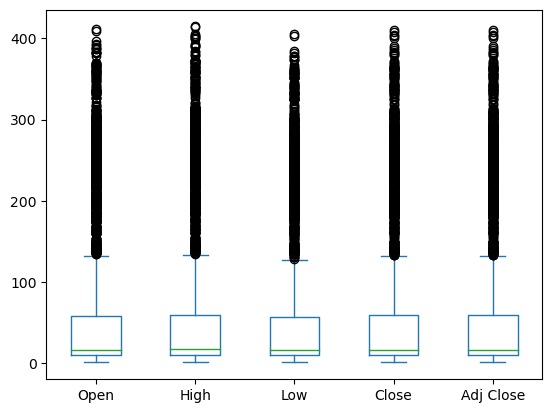

In [8]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
#Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla', 
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont = dict(
             family = 'Courier New, monospace',
             size = 18,
             color = '#7f7f7f'
        )
    )
)

tesla_data = [{'x' : tesla['Date'], 'y' : tesla['Close']}]
plot=go.Figure(data = tesla_data, layout = layout)

In [10]:
#plot(plot) #plotting offline
iplot(plot)

In [11]:
#Building regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
#split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [13]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = tesla_data, layout = layout)

In [17]:
iplot(plot2)

In [18]:
scores = f'''
{'Metrics'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metrics          Train                Test        
r2_score  0.5672064819538993	0.5859195335891874
MSE       4269.112297508356	4095.981750851699

